In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('rcSales.csv')

In [4]:
data.head()

,Month,Volume
0,01/01/2001,648
1,01/02/2001,646
2,01/03/2001,639
3,01/04/2001,654
4,01/05/2001,630


In [5]:
data.shape

(114, 2)

In [6]:
data.head(16)

,Month,Volume
0,01/01/2001,648
1,01/02/2001,646
2,01/03/2001,639
3,01/04/2001,654
4,01/05/2001,630
5,01/06/2001,622
6,01/07/2001,617
7,01/08/2001,613
8,01/09/2001,661
9,01/10/2001,695


In [7]:
data['Month'].max()

'01/12/2009'

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   114 non-null    object
 1   Volume  114 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [9]:
data['Month']=pd.to_datetime(data['Month'], format='%d/%m/%Y')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   114 non-null    datetime64[ns]
 1   Volume  114 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 KB


In [11]:
data.head(3)

,Month,Volume
0,2001-01-01,648
1,2001-02-01,646
2,2001-03-01,639


In [12]:
data.set_index('Month',inplace=True)

In [13]:
data.head()

,Volume
Month,
2001-01-01,648
2001-02-01,646
2001-03-01,639
2001-04-01,654
2001-05-01,630


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 2001-01-01 to 2010-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Volume  114 non-null    int64
dtypes: int64(1)
memory usage: 1.8 KB


<Axes: xlabel='Month'>

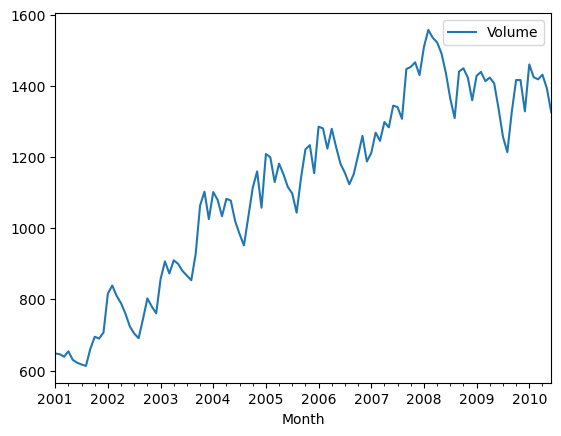

In [15]:
data.plot()

In [17]:
data.index.max()

Timestamp('2010-06-01 00:00:00')

In [18]:
data.index.min()

Timestamp('2001-01-01 00:00:00')

### Decomposition of Time Seeries Components

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [22]:
result = seasonal_decompose(data)

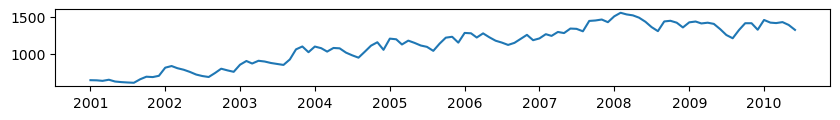

In [25]:
plt.figure(figsize=(10,1))
plt.plot(data)
plt.show()

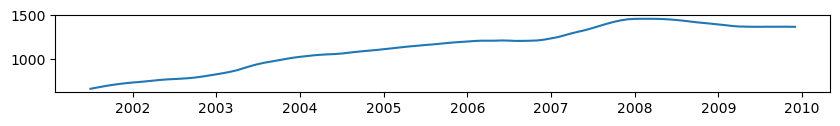

In [24]:
plt.figure(figsize=(10,1))
plt.plot(result.trend)
plt.show()

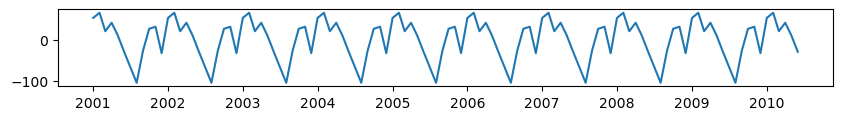

In [26]:
plt.figure(figsize=(10,1))
plt.plot(result.seasonal)
plt.show()

In [27]:
data.index

DatetimeIndex(['2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01',
               ...
               '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01',
               '2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01'],
              dtype='datetime64[ns]', name='Month', length=114, freq=None)

In [28]:
data.index.month

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
        9, 10, 11, 12,  1,  2,  3,  4,  5,  6],
      dtype='int32', name='Month', length=114)

In [29]:
data.index.year

Index([2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001,
       ...
       2009, 2009, 2009, 2009, 2010, 2010, 2010, 2010, 2010, 2010],
      dtype='int32', name='Month', length=114)

<Axes: xlabel='year', ylabel='Volume'>

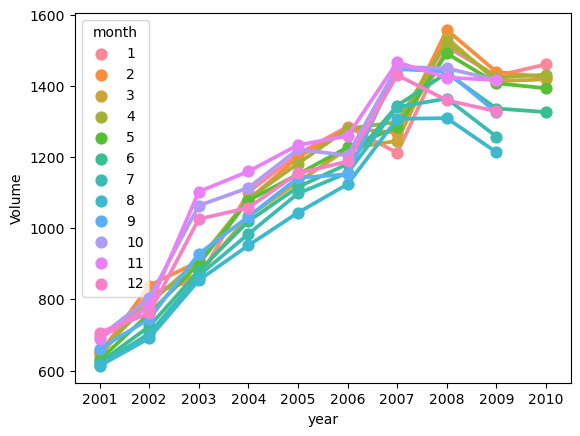

In [32]:
import seaborn as sns
df_temp = data.copy()
df_temp['month']=data.index.month
df_temp['year']=data.index.year
#sns.pointplot(data=data,x=data.index.year, y='Volume', hue=data.index.month)
sns.pointplot(data=df_temp, x='year', y='Volume', hue='month')

<Axes: xlabel='month', ylabel='Volume'>

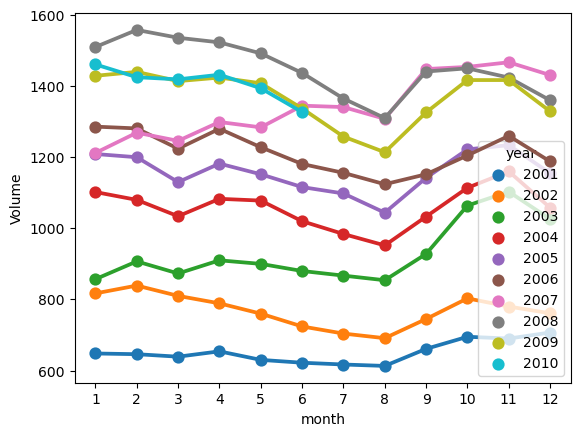

In [33]:
sns.pointplot(data=df_temp, x='month', y='Volume', hue='year')

<Axes: xlabel='year', ylabel='Volume'>

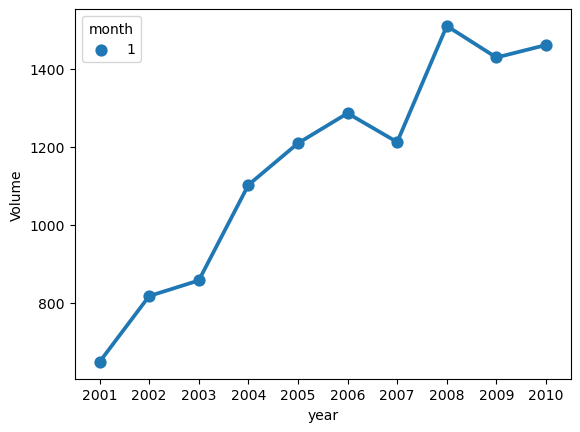

In [35]:
sns.pointplot(data=df_temp[df_temp.month==1], x='year', y='Volume', hue='month')

### Stationary Check

In [36]:
from statsmodels.tsa.stattools import adfuller

In [40]:
x=data['Volume']
result=adfuller(x)
p_val = result[1]
print('p-value:', p_val)

# Ho: data is non-stationary
# H1: data is stationary
if p_val <=0.05:
    print('reject the null hypothesis, data is stationary')
else:
    print('accept the null hypothesis, data is not stationary')

p-value: 0.5153358797821737
accept the null hypothesis, data is not stationary


### Non-Stationary to Stationary using Differencing

In [41]:
data['first_diff'] = data['Volume']-data['Volume'].shift(1)

In [42]:
data.head()

,Volume,first_diff
Month,,
2001-01-01,648,NaN
2001-02-01,646,-2.0
2001-03-01,639,-7.0
2001-04-01,654,15.0
2001-05-01,630,-24.0


In [43]:
646-648

-2

In [44]:
639-646

-7

In [46]:
x=data['first_diff'].dropna()
result=adfuller(x)
p_val = result[1]
print('p-value:', p_val)

# Ho: data is non-stationary
# H1: data is stationary
if p_val <=0.05:
    print('reject the null hypothesis, data is stationary')
else:
    print('accept the null hypothesis, data is not stationary')

p-value: 0.3140818370608518
accept the null hypothesis, data is not stationary


In [51]:
data['second_diff'] = data['Volume']-data['Volume'].shift(5)
x=data['second_diff'].dropna()
result=adfuller(x)
p_val = result[1]
print('p-value:', p_val)

# Ho: data is non-stationary
# H1: data is stationary
if p_val <=0.05:
    print('reject the null hypothesis, data is stationary')
else:
    print('accept the null hypothesis, data is not stationary')

p-value: 0.033448598963516686
reject the null hypothesis, data is stationary


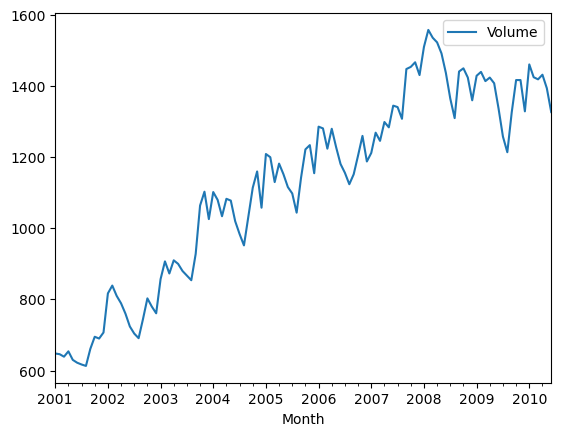

<Axes: xlabel='Month'>

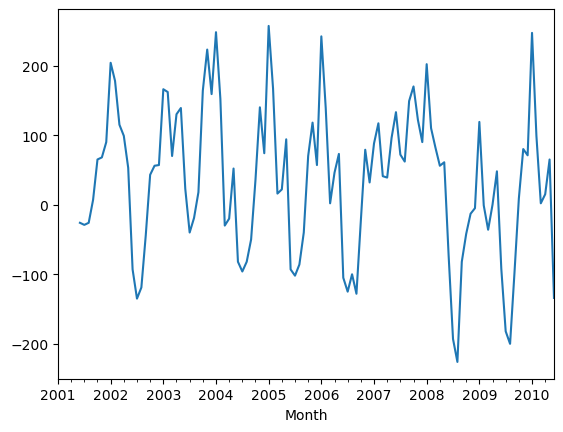

In [52]:
data['second_diff'].plot()

# Forecast Modelling

In [54]:
from statsmodels.tsa.arima.model import ARIMA

#### ARIMA
* AutoRegression + (differencing) + MovingAverage
* 
* parameters
* p = no.of lag observations
* d = dirrerencing
* q = size of the moving average window
* 
* order=(p,d,q)

### AR Model

In [57]:
model = ARIMA(data['Volume'], order=(1,0,0), freq='MS')
model_fit = model.fit()

D:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
data.head()

,Volume,first_diff,second_diff
Month,,,
2001-01-01,648,NaN,NaN
2001-02-01,646,-2.0,NaN
2001-03-01,639,-7.0,NaN
2001-04-01,654,15.0,NaN
2001-05-01,630,-24.0,NaN


<Axes: xlabel='Month'>

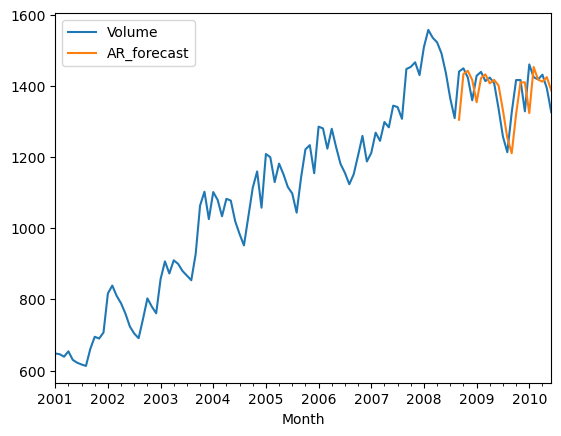

In [58]:
data['AR_forecast'] = model_fit.predict(start=92, end=114)
data[['Volume','AR_forecast']].plot()

In [59]:
data.tail(1)

,Volume,first_diff,second_diff,AR_forecast
Month,,,,
2010-06-01,1327,-67.0,-134.0,1387.938581


In [69]:
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime('2010-06-01', "%Y-%m-%d")
datelist = [start + relativedelta(months=x) for x in range(1,12)]
#print(datelist)

future = pd.DataFrame(index=datelist, columns=data.columns)
data2 = pd.concat([data,future])


In [70]:
data2.tail(15)

,Volume,first_diff,second_diff,AR_forecast
2010-03-01,1419,-6.0,2.0,1418.384051
2010-04-01,1432,13.0,15.0,1412.491379
2010-05-01,1394,-38.0,65.0,1425.258834
2010-06-01,1327,-67.0,-134.0,1387.938581
2010-07-01,NaN,NaN,NaN,NaN
2010-08-01,NaN,NaN,NaN,NaN
2010-09-01,NaN,NaN,NaN,NaN
2010-10-01,NaN,NaN,NaN,NaN
2010-11-01,NaN,NaN,NaN,NaN
2010-12-01,NaN,NaN,NaN,NaN


In [71]:
data.tail(1)

,Volume,first_diff,second_diff,AR_forecast
Month,,,,
2010-06-01,1327,-67.0,-134.0,1387.938581


In [72]:
data.tail(1)

,Volume,first_diff,second_diff,AR_forecast
Month,,,,
2010-06-01,1327,-67.0,-134.0,1387.938581


In [74]:
data2.tail(12)

,Volume,first_diff,second_diff,AR_forecast
2010-06-01,1327,-67.0,-134.0,1387.938581
2010-07-01,NaN,NaN,NaN,NaN
2010-08-01,NaN,NaN,NaN,NaN
2010-09-01,NaN,NaN,NaN,NaN
2010-10-01,NaN,NaN,NaN,NaN
2010-11-01,NaN,NaN,NaN,NaN
2010-12-01,NaN,NaN,NaN,NaN
2011-01-01,NaN,NaN,NaN,NaN
2011-02-01,NaN,NaN,NaN,NaN
2011-03-01,NaN,NaN,NaN,NaN


<Axes: >

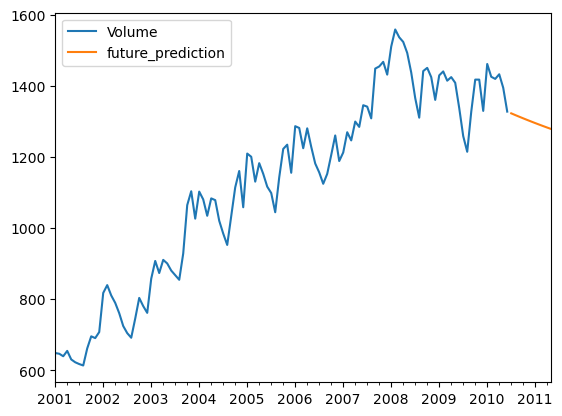

In [79]:
data2['future_prediction'] = model_fit.predict(start='2010-07-01', end='2011-06-01')
data2[['Volume','future_prediction']].plot()

In [80]:
data2.tail(15)

,Volume,first_diff,second_diff,AR_forecast,future_prediction
2010-03-01,1419,-6.0,2.0,1418.384051,NaN
2010-04-01,1432,13.0,15.0,1412.491379,NaN
2010-05-01,1394,-38.0,65.0,1425.258834,NaN
2010-06-01,1327,-67.0,-134.0,1387.938581,NaN
2010-07-01,NaN,NaN,NaN,NaN,1322.137081
2010-08-01,NaN,NaN,NaN,NaN,1317.361150
2010-09-01,NaN,NaN,NaN,NaN,1312.670651
2010-10-01,NaN,NaN,NaN,NaN,1308.064055
2010-11-01,NaN,NaN,NaN,NaN,1303.539863
2010-12-01,NaN,NaN,NaN,NaN,1299.096600


### ARMA Model

In [81]:
model2 = ARIMA(data['Volume'], order=(1,0,1), freq='MS')
model2_fit = model2.fit()

D:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

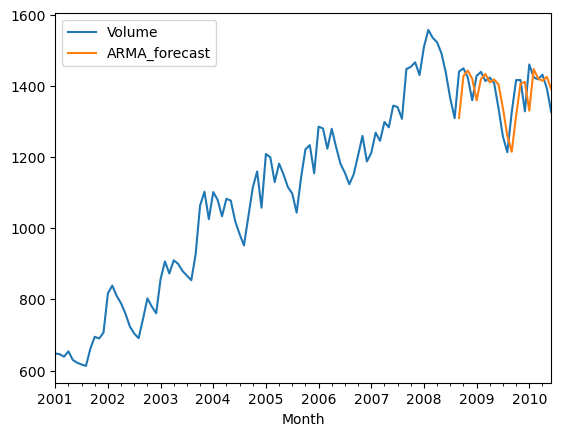

In [83]:
data['ARMA_forecast'] = model2_fit.predict(start=92, end=114)
data[['Volume','ARMA_forecast']].plot()

<Axes: >

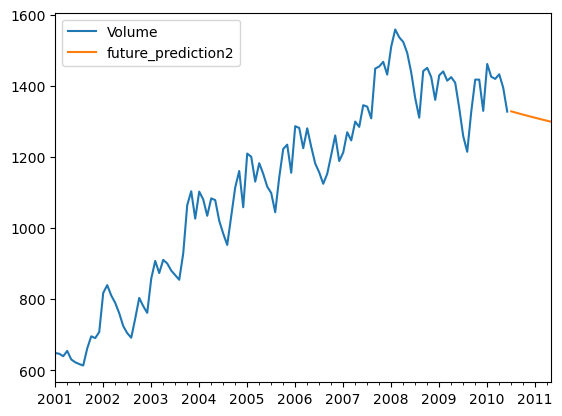

In [86]:
data2['future_prediction2'] = model2_fit.predict(start='2010-07-01', end='2011-06-01')
data2[['Volume','future_prediction2']].plot()

### ARIMA Model

In [87]:
model3 = ARIMA(data['Volume'], order=(1,1,1), freq='MS')
model3_fit = model3.fit()

D:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: >

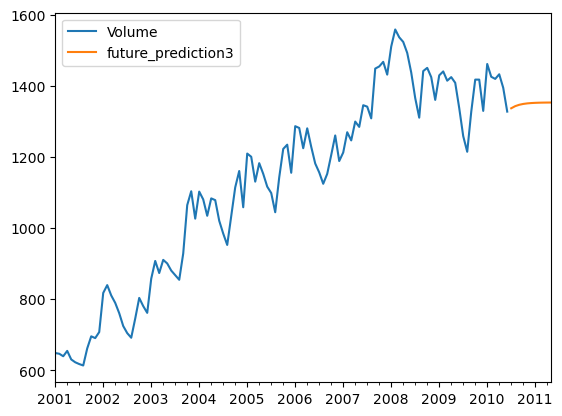

In [88]:
data2['future_prediction3'] = model3_fit.predict(start='2010-07-01', end='2011-06-01')
data2[['Volume','future_prediction3']].plot()

### SARIMA Model

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [90]:
model4 = SARIMAX(data['Volume'], order=(2,2,2), seasonal_order=(2,2,2,12), freq='MS')
model4_fit = model4.fit()

D:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
D:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

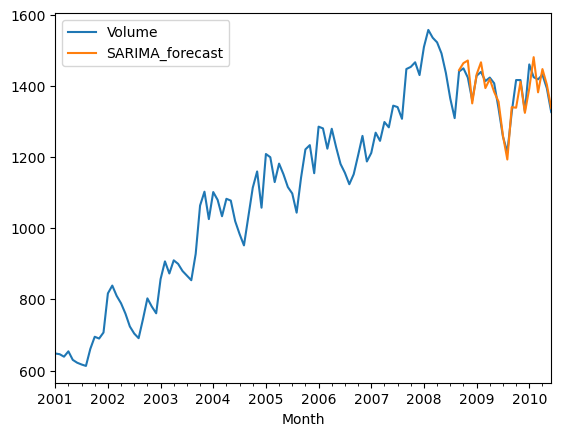

In [92]:
data['SARIMA_forecast'] = model4_fit.predict(start=92, end=114)
data[['Volume','SARIMA_forecast']].plot()

<Axes: >

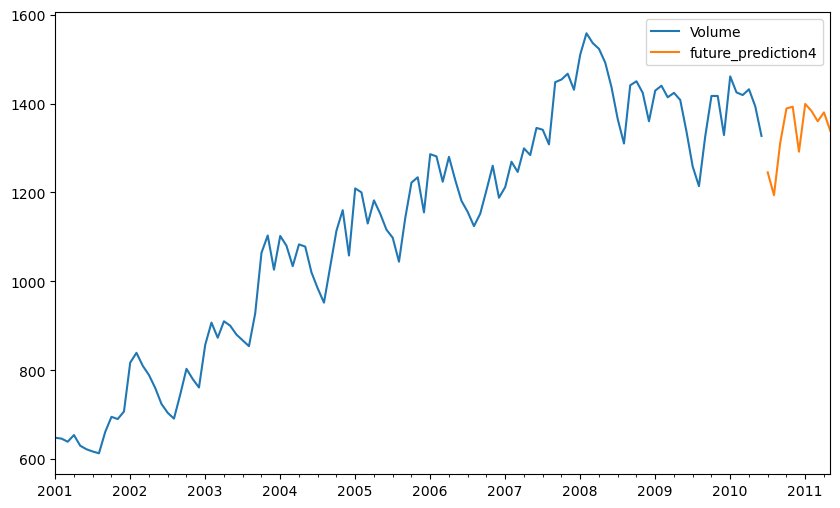

In [93]:
data2['future_prediction4'] = model4_fit.predict(start=114, end=126)
data2[['Volume','future_prediction4']].plot(figsize=(10,6))